In [6]:
#First of all Import all the library which we'll use to get further details.

from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import requests

#create lists to store data within.

Names = []
Cities = []
Posted_on = []
Ratings = []
Reviews = []
Occasion = []

In [9]:
#fetch the data from site(FlowerAura)

url = "https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page="

for i in range(1,51):
    cnp = url+str(i)
    url_new = cnp
    
    r = requests.get(url_new)
    
    soup = BeautifulSoup(r.text, "html.parser")
    soup
    
    
    main = soup.find("div",{"class":"review-left-container"})
    sub = main.find_all("div",{"class":"new-review-card-container"})
    
    for i in sub:
        name= i.find("span",{"class":"review-author-name"})
        Names.append(name.text.title())
    
        city= i.find_all("span",{"class":"review-meta-details"})
        Cities.append(city[0].text.title())
    
        try:
            Occasion.append(city[1].text.title())
        except:
            Occasion.append(np.nan)
            
        date = i.find_all("span")  
        try:
            Posted_on.append(date[4].text) 
        except:
            Posted_on.append(np.nan)  
    
        rating = i.find("span",{"class":"star-count-container"})
        Ratings.append(rating.text)
    
        review = i.find_all("div")
        Reviews.append(review[-1].text)

In [10]:
# Raw dataframe

df = pd.DataFrame({"Names":Names,"Cities":Cities,"Posted_on":Posted_on,"Occasion":Occasion,"Reviews":Reviews,"Ratings":Ratings})
df

,Names,Cities,Posted_on,Occasion,Reviews,Ratings
0,Inaya,Udaipur,Posted On : 31st Aug 2025,NaN,Very beautifull on tome delivered.,5
1,Nallapandiyan D,Coimbatore,Posted On : 11th Jul 2025,Occassion : Birthday,Thanks for the timely delivery.,4
2,Ushashree Gangaputra,Hyderabad,Posted On : 11th Jun 2025,Occassion : Love & Romance,"Beautiful red roses , reached before time Than...",5
3,Tabassum Farooqui,Aligarh,Posted On : 25th Mar 2025,Occassion : Anniversary,Flowers are fresh and beautiful. Thank you Flo...,5
4,Ajay Kumar,Delhi,Posted On : 11th Feb 2025,Occassion : Rose Day,Thank you For Participation in my Loving Moment.,5
...,...,...,...,...,...,...
495,Prernasaini,Gurgaon,Posted On : 8th Sep 2023,NaN,Thank you so much,5
496,Jhanvi Jaiswal,Mumbai,Posted On : 7th Sep 2023,NaN,Thankyou somuch for helping and making my surp...,5
497,Shashikala,Varanasi,Posted On : 5th Sep 2023,Occassion : Birthday,Loved it,5
498,Anu Sharma,Chandigarh,Posted On : 5th Sep 2023,Occassion : Birthday,Stunning flower,5


In [12]:
#lets get dates as date's standard format:-

a = "Posted On : 31st Aug 2025"
x = a.index(":")
print(a[x+2:])

31st Aug 2025


In [13]:
#create function which will extract all dates & occasions within the DF in there standard format:-
def extract(value):
    try:
        x = value.index(":")
        return value[x+2:]
    except:
        return np.nan
df["Posted_on"]= df["Posted_on"].apply(extract)
df["Occasion"]= df["Occasion"].apply(extract)
df

,Names,Cities,Posted_on,Occasion,Reviews,Ratings
0,Inaya,Udaipur,31st Aug 2025,NaN,Very beautifull on tome delivered.,5
1,Nallapandiyan D,Coimbatore,11th Jul 2025,Birthday,Thanks for the timely delivery.,4
2,Ushashree Gangaputra,Hyderabad,11th Jun 2025,Love & Romance,"Beautiful red roses , reached before time Than...",5
3,Tabassum Farooqui,Aligarh,25th Mar 2025,Anniversary,Flowers are fresh and beautiful. Thank you Flo...,5
4,Ajay Kumar,Delhi,11th Feb 2025,Rose Day,Thank you For Participation in my Loving Moment.,5
...,...,...,...,...,...,...
495,Prernasaini,Gurgaon,8th Sep 2023,NaN,Thank you so much,5
496,Jhanvi Jaiswal,Mumbai,7th Sep 2023,NaN,Thankyou somuch for helping and making my surp...,5
497,Shashikala,Varanasi,5th Sep 2023,Birthday,Loved it,5
498,Anu Sharma,Chandigarh,5th Sep 2023,Birthday,Stunning flower,5


In [14]:
#removing all suffix:- 

rep = ["th","st","rd","nd"]
for i in rep:
    df["Posted_on"]= df["Posted_on"].str.replace(i,"")
df

,Names,Cities,Posted_on,Occasion,Reviews,Ratings
0,Inaya,Udaipur,31 Aug 2025,NaN,Very beautifull on tome delivered.,5
1,Nallapandiyan D,Coimbatore,11 Jul 2025,Birthday,Thanks for the timely delivery.,4
2,Ushashree Gangaputra,Hyderabad,11 Jun 2025,Love & Romance,"Beautiful red roses , reached before time Than...",5
3,Tabassum Farooqui,Aligarh,25 Mar 2025,Anniversary,Flowers are fresh and beautiful. Thank you Flo...,5
4,Ajay Kumar,Delhi,11 Feb 2025,Rose Day,Thank you For Participation in my Loving Moment.,5
...,...,...,...,...,...,...
495,Prernasaini,Gurgaon,8 Sep 2023,NaN,Thank you so much,5
496,Jhanvi Jaiswal,Mumbai,7 Sep 2023,NaN,Thankyou somuch for helping and making my surp...,5
497,Shashikala,Varanasi,5 Sep 2023,Birthday,Loved it,5
498,Anu Sharma,Chandigarh,5 Sep 2023,Birthday,Stunning flower,5


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Names         500 non-null    object        
 1   Cities        500 non-null    object        
 2   Posted_on     500 non-null    datetime64[ns]
 3   Occasion      387 non-null    object        
 4   Reviews       500 non-null    object        
 5   Ratings       500 non-null    float64       
 6   Polarity      500 non-null    float64       
 7   Subjectivity  500 non-null    float64       
 8   Score         500 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 35.3+ KB


In [16]:
df["Posted_on"] = pd.to_datetime(df["Posted_on"])
df["Ratings"] = df["Ratings"].astype("float")
df["Polarity"] = [TextBlob(i).sentiment.polarity for i in df["Reviews"]]
df["Subjectivity"] = [TextBlob(i).subjectivity for i in df["Reviews"]]
df

,Names,Cities,Posted_on,Occasion,Reviews,Ratings,Polarity,Subjectivity
0,Inaya,Udaipur,2025-08-31,NaN,Very beautifull on tome delivered.,5.0,0.200000,0.300000
1,Nallapandiyan D,Coimbatore,2025-07-11,Birthday,Thanks for the timely delivery.,4.0,0.200000,0.200000
2,Ushashree Gangaputra,Hyderabad,2025-06-11,Love & Romance,"Beautiful red roses , reached before time Than...",5.0,0.425000,0.500000
3,Tabassum Farooqui,Aligarh,2025-03-25,Anniversary,Flowers are fresh and beautiful. Thank you Flo...,5.0,0.716667,0.600000
4,Ajay Kumar,Delhi,2025-02-11,Rose Day,Thank you For Participation in my Loving Moment.,5.0,0.600000,0.950000
...,...,...,...,...,...,...,...,...
495,Prernasaini,Gurgaon,2023-09-08,NaN,Thank you so much,5.0,0.200000,0.200000
496,Jhanvi Jaiswal,Mumbai,2023-09-07,NaN,Thankyou somuch for helping and making my surp...,5.0,0.408333,0.758333
497,Shashikala,Varanasi,2023-09-05,Birthday,Loved it,5.0,0.700000,0.800000
498,Anu Sharma,Chandigarh,2023-09-05,Birthday,Stunning flower,5.0,0.500000,1.000000


In [17]:
#adding Polarity to know how it has been performing:-

p = df["Polarity"].mean()
if p <= 0:
    print("Negative")
else:
    print("Positive")


Positive


In [18]:
def score(value):
    if value <= 0:
        return"Negative"
    else:
        return"Positive"
df["Score"]= df["Polarity"].apply(score)
df

,Names,Cities,Posted_on,Occasion,Reviews,Ratings,Polarity,Subjectivity,Score
0,Inaya,Udaipur,2025-08-31,NaN,Very beautifull on tome delivered.,5.0,0.200000,0.300000,Positive
1,Nallapandiyan D,Coimbatore,2025-07-11,Birthday,Thanks for the timely delivery.,4.0,0.200000,0.200000,Positive
2,Ushashree Gangaputra,Hyderabad,2025-06-11,Love & Romance,"Beautiful red roses , reached before time Than...",5.0,0.425000,0.500000,Positive
3,Tabassum Farooqui,Aligarh,2025-03-25,Anniversary,Flowers are fresh and beautiful. Thank you Flo...,5.0,0.716667,0.600000,Positive
4,Ajay Kumar,Delhi,2025-02-11,Rose Day,Thank you For Participation in my Loving Moment.,5.0,0.600000,0.950000,Positive
...,...,...,...,...,...,...,...,...,...
495,Prernasaini,Gurgaon,2023-09-08,NaN,Thank you so much,5.0,0.200000,0.200000,Positive
496,Jhanvi Jaiswal,Mumbai,2023-09-07,NaN,Thankyou somuch for helping and making my surp...,5.0,0.408333,0.758333,Positive
497,Shashikala,Varanasi,2023-09-05,Birthday,Loved it,5.0,0.700000,0.800000,Positive
498,Anu Sharma,Chandigarh,2023-09-05,Birthday,Stunning flower,5.0,0.500000,1.000000,Positive


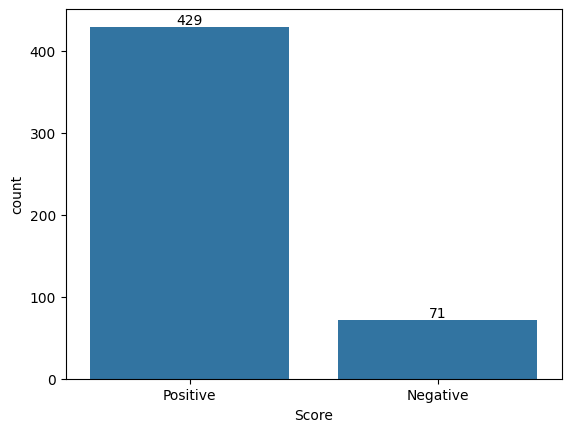

In [19]:
#adding barplot to get the idea of positive and negative reviews:-

ax = sns.countplot(x=df["Score"], data = df)

ax.bar_label(container = ax.containers[0])
plt.show()

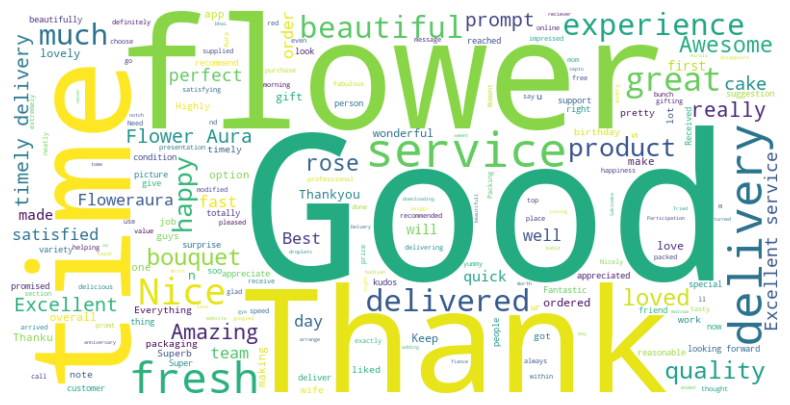

In [21]:
from wordcloud import WordCloud , STOPWORDS
import matplotlib.pyplot as plt

#Two DataFrame created for postive and negative wordcloud

df_pos = df.loc[(df["Score"]=="Positive")]
df_neg = df.loc[(df["Score"]=="Negative")]

# For Positive wordcloud

text = " ".join(text for text in df_pos["Reviews"])
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()





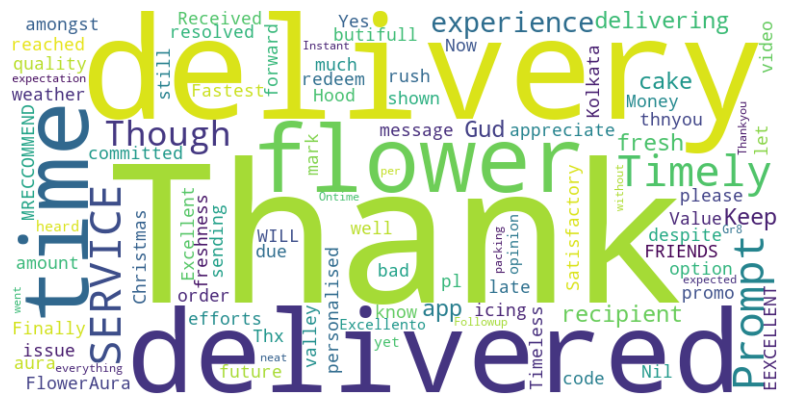

In [23]:
#For negative wordcloud


text = " ".join(text for text in df_neg["Reviews"])
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [26]:
# finding correlation between ratings and polarity:-

correlation = df["Ratings"].corr(df["Polarity"])
print("Correlation between Ratings and Polarity:", correlation)


Correlation between Ratings and Polarity: -0.014592084259393826


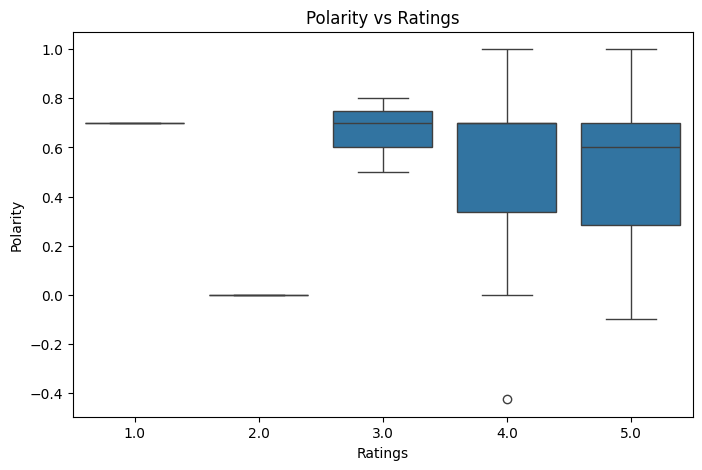

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Ratings", y="Polarity", data=df)
plt.title("Polarity vs Ratings")
plt.show()


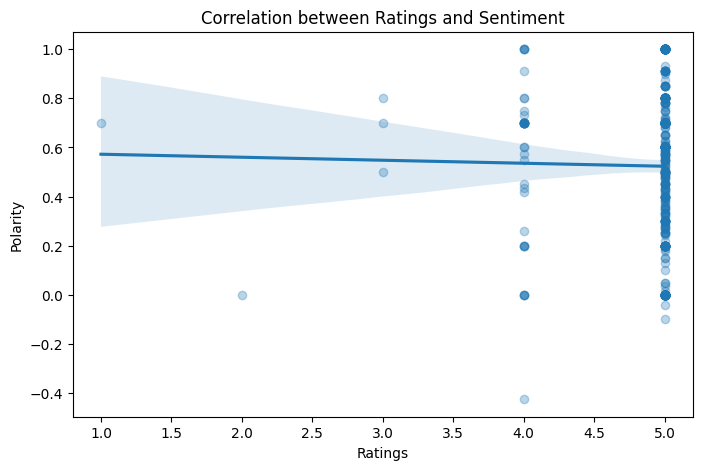

In [28]:
plt.figure(figsize=(8,5))
sns.regplot(x="Ratings", y="Polarity", data=df, scatter_kws={"alpha":0.3})
plt.title("Correlation between Ratings and Sentiment")
plt.show()


In [30]:
#calculatig review length written by customers whether it is Positive or negative:- 

df["Review_length"] = df["Reviews"].apply(lambda x: len(str(x).split()))  # word count
df["Review_length"]


0       5
1       5
2      14
3      13
4       8
       ..
495     4
496    44
497     2
498     2
499     4
Name: Review_length, Length: 500, dtype: int64

In [31]:
corr = df["Review_length"].corr(df["Polarity"])
print("Correlation between Review Length and Sentiment Polarity:", corr)


Correlation between Review Length and Sentiment Polarity: -0.139868849603603


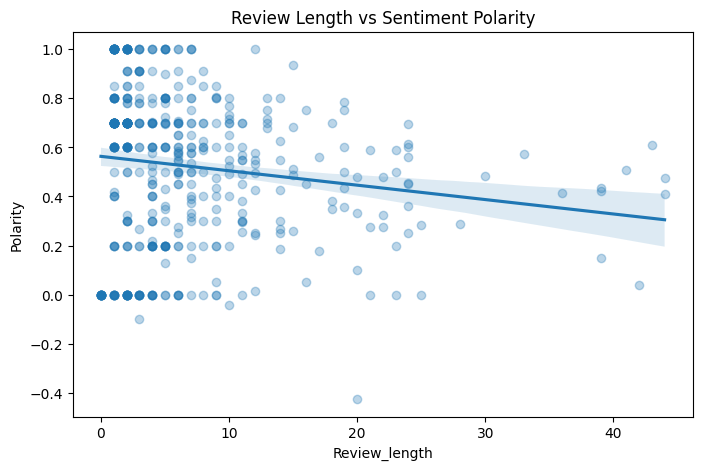

In [32]:
plt.figure(figsize=(8,5))
sns.regplot(x="Review_length", y="Polarity", data=df, scatter_kws={"alpha":0.3})
plt.title("Review Length vs Sentiment Polarity")
plt.show()


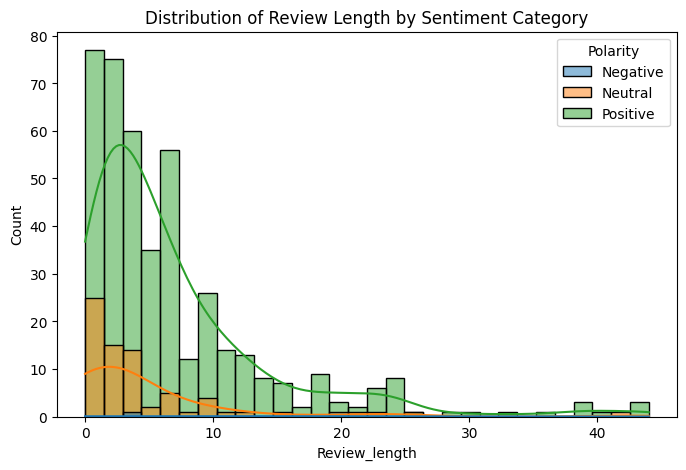

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Review_length", hue=pd.cut(df["Polarity"], bins=[-1,-0.1,0.1,1], labels=["Negative","Neutral","Positive"]), kde=True)
plt.title("Distribution of Review Length by Sentiment Category")
plt.show()


In [ ]:
#🌸 Sentiment Analysis Report – 10-red-roses-bouquet (FlowerAura)


1. Overview of Data
We pulled customer reviews and cleaned them up (handled missing values, and standardized text).
We also added two extra features: sentiment polarity (positive/negative strength) and
review length to understand how people express their opinions.

2. Sentiment Analysis Results

Review distribution: Most reviews leaned positive, but there’s a noticeable chunk of neutral/negative ones too.

Ratings vs Sentiment: Higher star ratings (4–5) clearly matched with more positive sentiment scores,
while 1–2 star ratings had slightly negative sentiment.

Average sentiment per rating: Smooth upward trend—sentiment gets more positive as rating goes higher.

Review length: Longer reviews often carried stronger opinions—people wrote more when they were either very happy or very upset.

3. Insights

Positives: Customers loved the freshness, fragrance, and packaging of the Red Flower. Delivery speed and presentation also got frequent appreciation.

Negatives: Common complaints were around late delivery, inconsistent quality, and price being slightly high compared to expectations.

Patterns: Happy customers tend to leave longer, descriptive reviews, while unhappy ones often write sharp but shorter feedback.

4. Recommendations

Fix the pain points: Improve delivery timelines and ensure more consistency in flower quality to cut down negative reviews.

Highlight strengths in marketing: Push ads/socials around freshness, fragrance, and premium packaging—customers already value these.

Engage reviewers: Encourage satisfied buyers to share photos/reviews online; this will amplify positive sentiment.

Price positioning: If prices are higher, stress the premium quality angle in branding, so customers feel it’s worth it.

👉 In short: People love the Red Flower, especially its freshness and presentation, 
but ironing out delivery and quality issues will make it a stronger winner for FlowerAura 🌹✨


                                                                                                                     Presented by: Muskan Singh